# [EDA] 了解變數分布狀態: Bar & KDE (density plot)

# [教學目標]
- 以下程式碼將示範如何繪製各種分布圖, 更直覺地看出單一變數本身的分布情形
- 分布圖包含 KDE(Kenel Density Estimation) 曲線, 以及 Bar(區間長條圖), 提供兩種不同感受
- 順便熟悉 matplotlib 的幾種繪圖設定

# [範例重點]
- 各種樣式的長條圖(Bar) (In[4], Out[4])   
- 不同的 KDE 曲線與繪圖設定 (In[5], Out[5]) 以及切換不同 Kernel function 的效果 (In[6], Out[6])

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
%matplotlib inline

# 忽略警告訊息
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = '../../data/Part01'

In [2]:
# 讀取檔案
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ../../data/Part01\application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 資料整理 ( 'DAYS_BIRTH'全部取絕對值 )
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

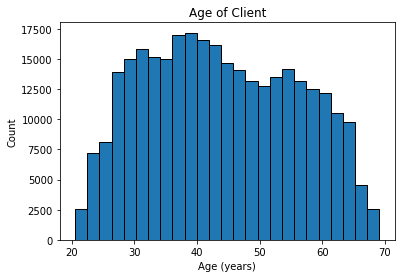

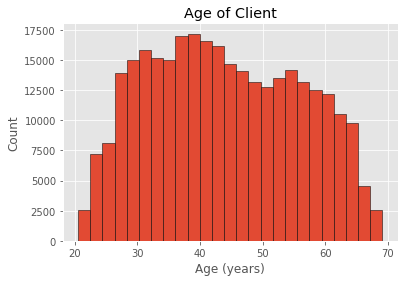

In [4]:
# 以生存年數繪製分布圖
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');
plt.show()

# 改變繪圖樣式 (style)
plt.style.use('ggplot') 

# 改變樣式後再繪圖一次, 比較效果
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');
plt.show()

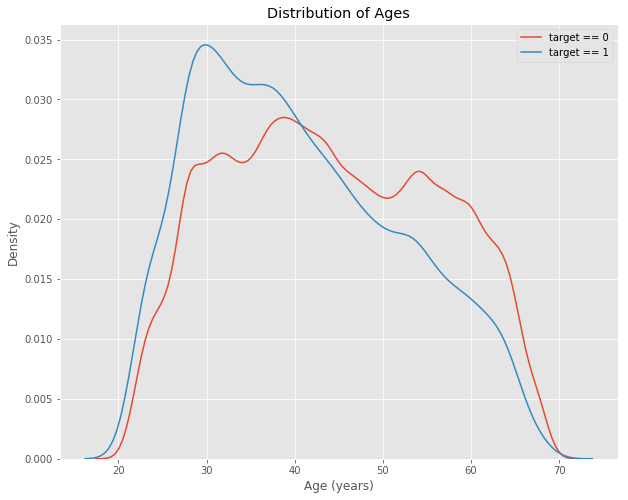

In [5]:
# 設定繪圖區域的長與寬
plt.figure(figsize = (10, 8))

# Kenel Density Estimation (KDE) plot: 會準時還貸者 - 下圖紅線
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')
# KDE plot: 不會準時還貸者 - 下圖藍線
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# 設定標題與 X, y 軸的說明
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

# 輸出繪圖 : 有的ipynb環境, 會在一格結束時自動輸出繪圖, 但加上這行能保證在不同環境都會畫出圖形
plt.show()

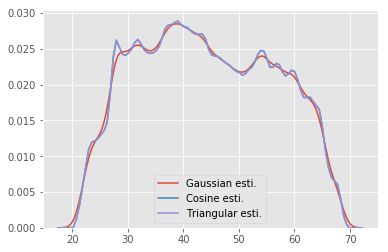

In [6]:
# KDE, 比較不同的 kernel function
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'Gaussian esti.', kernel='gau')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'Cosine esti.', kernel='cos')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'Triangular esti.', kernel='tri')
plt.show()

### 補充說明: 
1. [KDE](https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html#sphx-glr-auto-examples-neighbors-plot-kde-1d-py)
2. [什麼是 KDE](https://blog.csdn.net/unixtch/article/details/78556499)

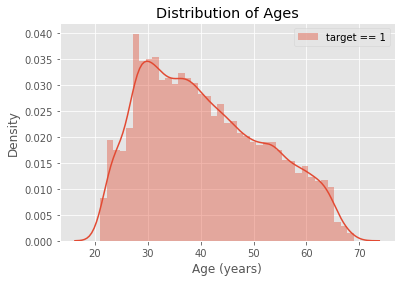

In [7]:
# 完整分布圖 (distplot) : 將 bar 與 Kde 同時呈現
sns.distplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')
plt.legend()
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');
plt.show()

# It's your turn
## 除了直接觀察變項以外，我們也可以分群比較
1. 自 20 到 70 歲，切 11 個點，進行分群比較 (KDE plot)
2. 以年齡區間為 x, target 為 y 繪製 barplot

In [9]:
bin_cut = np.linspace(20,70,11)
bin_cut

array([20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.])

In [11]:
app_train['BIRTH_YEARS'] = app_train['DAYS_BIRTH'] /365
app_train['BIRTH_YEARS'].value_counts()

37.668493    43
36.934247    42
49.994521    41
27.452055    41
28.197260    40
43.208219    40
39.438356    39
39.087671    39
31.956164    39
36.336986    39
40.523288    38
41.210959    38
37.216438    38
37.353425    38
37.775342    38
42.643836    38
36.931507    38
38.057534    38
40.794521    37
35.084932    37
40.520548    37
27.923288    37
27.769863    37
36.210959    37
39.112329    37
30.432877    37
54.997260    37
42.638356    37
27.690411    37
40.457534    37
             ..
68.273973     1
68.419178     1
68.849315     1
21.736986     1
68.539726     1
68.706849     1
68.156164     1
68.975342     1
68.939726     1
68.616438     1
68.726027     1
67.356164     1
68.213699     1
68.109589     1
65.358904     1
69.016438     1
21.909589     1
68.841096     1
66.443836     1
68.164384     1
68.789041     1
68.764384     1
21.619178     1
68.624658     1
66.939726     1
68.416438     1
68.942466     1
21.408219     1
68.808219     1
68.580822     1
Name: BIRTH_YEARS, Lengt

In [12]:
print("max: {}".format(app_train['BIRTH_YEARS'].max()))
print("min: {}".format(app_train['BIRTH_YEARS'].min()))

max: 69.12054794520547
min: 20.517808219178082


In [30]:
app_train['YEARS_GROUP'] = pd.cut(app_train['BIRTH_YEARS'], bins = bin_cut)
app_train['YEARS_GROUP'].value_counts()

(35.0, 40.0]    42868
(40.0, 45.0]    41406
(30.0, 35.0]    39440
(45.0, 50.0]    35135
(50.0, 55.0]    34942
(55.0, 60.0]    33120
(25.0, 30.0]    32862
(60.0, 65.0]    27476
(20.0, 25.0]    12159
(65.0, 70.0]     8103
Name: YEARS_GROUP, dtype: int64

In [36]:
intervals = app_train['YEARS_GROUP'].sort_index().value_counts().index.sort_values()
intervals

CategoricalIndex([(20.0, 25.0], (25.0, 30.0], (30.0, 35.0], (35.0, 40.0],
                  (40.0, 45.0], (45.0, 50.0], (50.0, 55.0], (55.0, 60.0],
                  (60.0, 65.0], (65.0, 70.0]],
                 categories=[(20.0, 25.0], (25.0, 30.0], (30.0, 35.0], (35.0, 40.0], (40.0, 45.0], (45.0, 50.0], (50.0, 55.0], (55.0, 60.0], ...], ordered=True, dtype='category')

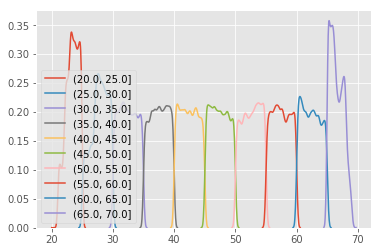

In [37]:
for interval in intervals:
    sns.kdeplot(app_train.loc[app_train['YEARS_GROUP'] == interval, 'DAYS_BIRTH'] / 365, label = '{}'.format(interval), kernel='gau')
plt.show()    


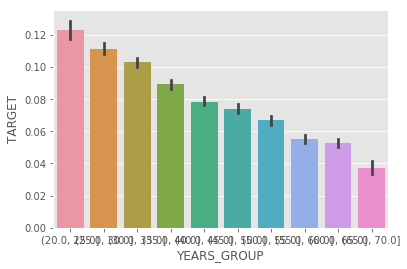

In [38]:
sns.barplot(app_train['YEARS_GROUP'],app_train['TARGET'])
plt.show()

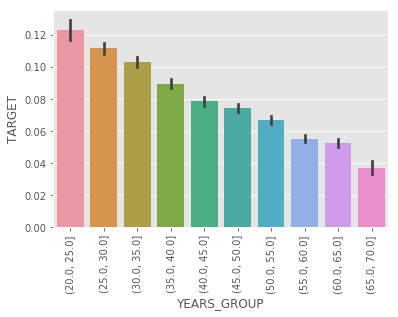

In [39]:
ax = sns.barplot(x = 'YEARS_GROUP', y = 'TARGET', data = app_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [41]:
app_train['YEARS_GROUP'].unique()

[(25.0, 30.0], (45.0, 50.0], (50.0, 55.0], (35.0, 40.0], (55.0, 60.0], (20.0, 25.0], (30.0, 35.0], (40.0, 45.0], (65.0, 70.0], (60.0, 65.0]]
Categories (10, interval[float64]): [(20.0, 25.0] < (25.0, 30.0] < (30.0, 35.0] < (35.0, 40.0] ... (50.0, 55.0] < (55.0, 60.0] < (60.0, 65.0] < (65.0, 70.0]]